In [17]:
!pip install Spacy


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import pandas as pd
import numpy as np
import nltk
import spacy

In [4]:
df=pd.read_csv("Scrap6000.csv")
df.head()

,Unnamed: 0,author,statement,source,date,target,BinaryTarget,BinaryNumTarget
0,0,Kwasi Gyamfi,"""Samsung drops out of $1 billion advertising c...",Facebook posts,"• August 2,",FALSE,FAKE,0
1,1,Marta Campabadal,"""Mark Zuckerberg, CEO de Meta, ha retirado la ...",Facebook posts,"• August 2,",FALSE,FAKE,0
2,2,Maria Briceño,El 31 de julio de 2024 confirmaron el fallecim...,Facebook posts,"August 2, 2024",FALSE,FAKE,0
3,3,Jill Terreri,Biden Executive Order 14019 “requires our taxp...,Claudia Tenney,"• August 2,",pants-fire,REAL,1
4,4,Sara Swann,Vice President Kamala Harris “was born in Cana...,Threads posts,"August 1, 2024",pants-fire,REAL,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5940 non-null   int64 
 1   author           5940 non-null   object
 2   statement        5940 non-null   object
 3   source           5940 non-null   object
 4   date             5940 non-null   object
 5   target           5940 non-null   object
 6   BinaryTarget     5940 non-null   object
 7   BinaryNumTarget  5940 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 371.4+ KB


In [23]:
df.isnull().sum()

author             0
statement          0
source             0
date               0
target             0
BinaryTarget       0
BinaryNumTarget    0
dtype: int64

In [12]:
df.drop(columns="Unnamed: 0",inplace=True)

In [13]:
df.head()

,author,statement,source,date,target,BinaryTarget,BinaryNumTarget
0,Kwasi Gyamfi,"""Samsung drops out of $1 billion advertising c...",Facebook posts,"• August 2,",FALSE,FAKE,0
1,Marta Campabadal,"""Mark Zuckerberg, CEO de Meta, ha retirado la ...",Facebook posts,"• August 2,",FALSE,FAKE,0
2,Maria Briceño,El 31 de julio de 2024 confirmaron el fallecim...,Facebook posts,"August 2, 2024",FALSE,FAKE,0
3,Jill Terreri,Biden Executive Order 14019 “requires our taxp...,Claudia Tenney,"• August 2,",pants-fire,REAL,1
4,Sara Swann,Vice President Kamala Harris “was born in Cana...,Threads posts,"August 1, 2024",pants-fire,REAL,1


In [14]:
df["target"].value_counts()

target
FALSE          3275
pants-fire     1033
barely-true     621
half-true       380
mostly-true     288
TRUE            166
REAL            144
full-flop        21
half-flip        11
no-flip           1
Name: count, dtype: int64

In [15]:
df["BinaryTarget"].value_counts()

BinaryTarget
FAKE    3321
REAL    2619
Name: count, dtype: int64

### Task 1:
####  1. Text Preprocessing:
#####   Perform tokenization, stemming, and lemmatization on the statement feature.
#####   Store tokenized, stemmed, and lemmatized versions in separate columns in the DataFrame.


In [38]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
stm=PorterStemmer()
lem=WordNetLemmatizer()

In [41]:
def process_text(text):
    tokens = word_tokenize(text)  
    stemmed = [stm.stem(word) for word in tokens] 
    lemmatized = [lem.lemmatize(word) for word in tokens]
    return tokens, stemmed, lemmatized


df['tokens'], df['stemmed'], df['lemmatized'] = zip(*df['statement'].apply(process_text))

In [44]:
df.head()

,author,statement,source,date,target,BinaryTarget,BinaryNumTarget,tokens,stemmed,lemmatized
0,Kwasi Gyamfi,"""Samsung drops out of $1 billion advertising c...",Facebook posts,"• August 2,",FALSE,FAKE,0,"[``, Samsung, drops, out, of, $, 1, billion, a...","[``, samsung, drop, out, of, $, 1, billion, ad...","[``, Samsung, drop, out, of, $, 1, billion, ad..."
1,Marta Campabadal,"""Mark Zuckerberg, CEO de Meta, ha retirado la ...",Facebook posts,"• August 2,",FALSE,FAKE,0,"[``, Mark, Zuckerberg, ,, CEO, de, Meta, ,, ha...","[``, mark, zuckerberg, ,, ceo, de, meta, ,, ha...","[``, Mark, Zuckerberg, ,, CEO, de, Meta, ,, ha..."
2,Maria Briceño,El 31 de julio de 2024 confirmaron el fallecim...,Facebook posts,"August 2, 2024",FALSE,FAKE,0,"[El, 31, de, julio, de, 2024, confirmaron, el,...","[el, 31, de, julio, de, 2024, confirmaron, el,...","[El, 31, de, julio, de, 2024, confirmaron, el,..."
3,Jill Terreri,Biden Executive Order 14019 “requires our taxp...,Claudia Tenney,"• August 2,",pants-fire,REAL,1,"[Biden, Executive, Order, 14019, “, requires, ...","[biden, execut, order, 14019, “, requir, our, ...","[Biden, Executive, Order, 14019, “, requires, ..."
4,Sara Swann,Vice President Kamala Harris “was born in Cana...,Threads posts,"August 1, 2024",pants-fire,REAL,1,"[Vice, President, Kamala, Harris, “, was, born...","[vice, presid, kamala, harri, “, wa, born, in,...","[Vice, President, Kamala, Harris, “, wa, born,..."


### 2. Extract unigrams, bigrams, and trigrams from the statement feature.
#### 	Display them separately in different columns of the DataFrame.

In [47]:
def extract_ngrams(text, n):
    tokens = word_tokenize(text)
    return list(nltk.ngrams(tokens, n))

df['unigrams'] = df['statement'].apply(lambda x: extract_ngrams(x, 1))
df['bigrams'] = df['statement'].apply(lambda x: extract_ngrams(x, 2))
df['trigrams'] = df['statement'].apply(lambda x: extract_ngrams(x, 3))

In [49]:
df[['tokens', 'bigrams', 'trigrams']].head()

,tokens,bigrams,trigrams
0,"[``, Samsung, drops, out, of, $, 1, billion, a...","[(``, Samsung), (Samsung, drops), (drops, out)...","[(``, Samsung, drops), (Samsung, drops, out), ..."
1,"[``, Mark, Zuckerberg, ,, CEO, de, Meta, ,, ha...","[(``, Mark), (Mark, Zuckerberg), (Zuckerberg, ...","[(``, Mark, Zuckerberg), (Mark, Zuckerberg, ,)..."
2,"[El, 31, de, julio, de, 2024, confirmaron, el,...","[(El, 31), (31, de), (de, julio), (julio, de),...","[(El, 31, de), (31, de, julio), (de, julio, de..."
3,"[Biden, Executive, Order, 14019, “, requires, ...","[(Biden, Executive), (Executive, Order), (Orde...","[(Biden, Executive, Order), (Executive, Order,..."
4,"[Vice, President, Kamala, Harris, “, was, born...","[(Vice, President), (President, Kamala), (Kama...","[(Vice, President, Kamala), (President, Kamala..."


### 3.	Named Entity Recognition (NER):
#### 	Extract named entities from the statement feature and store them in a separate column.


In [51]:
nlp = spacy.load("en_core_web_sm")

In [52]:
def extract_named_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df['named_entities'] = df['statement'].apply(extract_named_entities)

In [54]:
df["named_entities"][0]

[('Samsung', 'ORG'), ('$1 billion', 'MONEY'), ('Olympics', 'EVENT')]

#### rule based NER

In [56]:
import re

In [68]:
pattern_dict = {
    'ORG': r'\b(Google|Microsoft|Facebook|Instagram|Meta)\b', 
    'PERSON': r'\b([A-Z][a-z]+)\b'  
}

def rule_based_ner(text):
    entities = []
    for label, pattern in pattern_dict.items():
        matches = re.findall(pattern, text)
        if label == "PERSON":
            matches = [match for match in matches if match not in pattern_dict['ORG']]
        entities.extend([(match, label) for match in matches])
    return entities

df['rule_based_entities'] = df['statement'].apply(rule_based_ner)


In [69]:
df['rule_based_entities'][1]

[('Meta', 'ORG'),
 ('Facebook', 'ORG'),
 ('Instagram', 'ORG'),
 ('Mark', 'PERSON'),
 ('Zuckerberg', 'PERSON'),
 ('Maduro', 'PERSON')]

### 4.	Author Name Extraction & Visualization:
#### Extract author names from the dataset.
#### Use spaCy's displacy to visualize the extracted author names.


In [74]:
import matplotlib.pyplot as plt
nltk.download('averaged_perceptron_tagger')
from collections import Counter

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


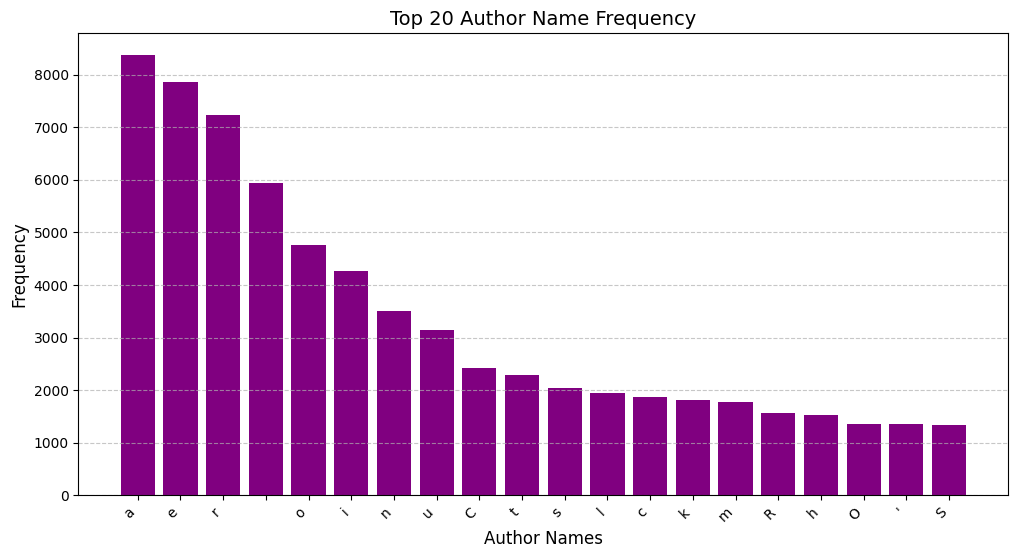

In [79]:
# Count occurrences of author names
author_counts = Counter([name for sublist in df['author'] for name in sublist])

# Get top 20 most frequent authors
top_authors = author_counts.most_common(20)

# Plot Author Name Frequency
plt.figure(figsize=(12,6))
plt.bar([name[0] for name in top_authors], [name[1] for name in top_authors], color='purple')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Author Names", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Top 20 Author Name Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Syntactic Parsing:

In [81]:
from spacy import displacy

In [82]:
sentence = "I am a Data Science student"
doc = nlp(sentence)
displacy.render(doc, style="dep", jupyter=True)

### 6.Lexicon based NER

In [89]:
lexicon = {
    'technology': ['AI', 'Machine Learning', 'Deep Learning', 'Python'],
    'organization': ['Google', 'Microsoft', 'Amazon',"Facebook"],
    'person': ['Elon Musk', 'Bill Gates',"Mark Zuckerberg"]
}

def lexicon_based_ner(text):
    entities = []
    for category, words in lexicon.items():
        for word in words:
            if word in text:
                entities.append((word, category))
    return entities

df['lexicon_entities'] = df['statement'].apply(lexicon_based_ner)

In [91]:
df['lexicon_entities'][1]

[('Facebook', 'organization'), ('Mark Zuckerberg', 'person')]

# Task 2:
### Compare Lexicon-Based Sentiment Analysis Using TextBlob, Vader , Pattern, SentiWordNet, Afinn  and Hugging Face model for sentimental analysis
### On the below text
### Text =” I really love Data science Department in the DAVV! It's running very amazing courses.”

### Textblob

In [92]:
from textblob import TextBlob

text = "I really love Data Science Department in the DAVV! It's running very amazing courses."
blob = TextBlob(text)
print(blob.sentiment)

Sentiment(polarity=0.7025000000000001, subjectivity=0.8)


### Vader

In [93]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
print(analyzer.polarity_scores(text))


{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.8714}


### Pattren

In [94]:
from pattern.en import sentiment

print(sentiment(text))


(0.7025000000000001, 0.8)


In [95]:
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
import nltk

### SentiWordNet

In [96]:

def get_sentiwordnet_sentiment(text):
    words = word_tokenize(text.lower())
    pos_score, neg_score = 0, 0
    
    for word in words:
        synsets = list(swn.senti_synsets(word))
        if synsets:
            pos_score += synsets[0].pos_score()
            neg_score += synsets[0].neg_score()
    
    return pos_score - neg_score  # Final sentiment score

print(get_sentiwordnet_sentiment(text))

1.5


### Afinn

In [97]:
from afinn import Afinn

afinn = Afinn()
print(afinn.score(text))


7.0


### Hugging Face Transformer Model

In [99]:
!pip install tf-keras

     ---------------------------------------- 1.7/1.7 MB 6.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [100]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
print(classifier(text))


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Dell\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
Device set to use 0


[{'label': 'POSITIVE', 'score': 0.9998626708984375}]
